In [9]:
import sys
import math
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader

sys.path.insert(0, "..")
import model_utils
import model_xformers_tutorial as mxt

filename = "runs/mm-ss4tut3-seq_len 64, wordmaxlen 2, nhead 4, nlayers 2, hidden_len 64, emb_len 32, vocab_len 689, dropout 0.2, batch_size 2048, batches_per_epoch 4, total_epochs 5000.torch"

net: mxt.TransformerModel = torch.load(filename)


In [10]:
textmap = model_utils.TextMapper(seq_len=64, filename="shakespeare.txt", wordmaxlen=2, device="cuda", dtype=torch.long)
all_pairs = textmap.as_pairs()
dataloader = DataLoader(all_pairs, batch_size=1, shuffle=True)

dataloader_it = iter(dataloader)


TextMapper: seq_len=64 self.vocab_len=689


^Look you, sir, here is the hand and seal of the ^duke: you know the character, I doubt not;
 123456789 123456789 123456789 123456789 123456789 123456789 123456789 123456789 123456789 1
0         1         2         3         4         5         6         7         8         9         


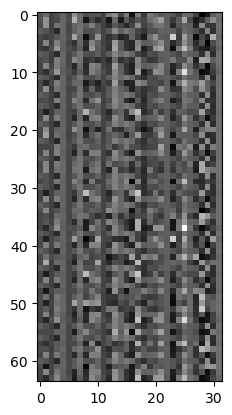

In [15]:

inputs, truth = next(dataloader_it)
inputs_emb = net.encoder(inputs[:1])

# print(f"{inputs=}")
# print(f"{inputs.shape=}")
# print(f"{inputs[0].shape=}")
s = textmap.to_str(inputs[0])
s = s.replace("\n", "^")
print(s)
digits = " 123456789" * (len(s) // 10 + 1)
digits = digits[:len(s)]
digits2 = "".join([(str(d) + " " * 9) for d in range(len(s) // 10 + 1)])
print(digits)
print(digits2)                   

seq_len = inputs.shape[-1]
mask = mxt.generate_square_subsequent_mask(seq_len, device="cuda")
inputs = net.encoder(inputs) * math.sqrt(net.emb_len)
inputs = net.pos_encoder(inputs)
inputs = inputs.transpose(0, 1)
output = net.transformer_encoder(inputs, mask)
output = output.transpose(1, 0)

plt.imshow(output[0].softmax(dim=-1).detach().cpu(), cmap='gray')

torch.Size([3, 3])